# 1.) Pull in Data and Convert ot Monthly

YUSONG CHEN 306315484

In [47]:
import statsmodels.api as sm
import statsmodels as sms
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
import yfinance as yf

In [48]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]
df.head()

[*********************100%%**********************]  1 of 1 completed


,Adj Close
Date,
1980-12-31,0.117887
1981-01-31,0.097591
1981-02-28,0.091546
1981-03-31,0.084637
1981-04-30,0.098023


# 2.) Create columns. 
- Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [49]:
# Difference in stock price
df["Diff"] = df.diff().shift(-1)
# different across 1 period

# Target
df["Target"] = np.sign(df["Diff"])
# sign give us + or -

df["Premium"] = .08 * df["Adj Close"]

# 3.) Pull in X data, normalize and build a LogReg on column 2

In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [51]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [52]:
y = df.loc[:"2023-09-30","Target"].copy()

df = df.loc[:"2023-09-30",:].copy()

df.head()

,Adj Close,Diff,Target,Premium
Date,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431
1981-01-31,0.097591,-0.006045,-1.0,0.007807
1981-02-28,0.091546,-0.006909,-1.0,0.007324
1981-03-31,0.084637,0.013386,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842


In [53]:
# fit a log reg 
logreg = LogisticRegression()

logreg.fit(X,y)

y_pred = logreg.predict(X)

# 4.) Add columns, prediction and profits.

In [54]:
y_pred = logreg.predict(X)

In [55]:
df["Predictions"] = y_pred

In [56]:
df["Profits"] = 0

In [57]:
# True positives
df.loc[(df["Predictions"] == 1)& (df["Target"] == 1), "Profits"] = df["Premium"]

# False positive
df.loc[(df["Predictions"] == 1)& (df["Target"] == -1), "Profits"] = 100 * df["Diff"] + df["Premium"]
df
# we should not equal negative sign cuz the diff is already negative 

,Adj Close,Diff,Target,Premium,Predictions,Profits
Date,,,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431,-1.0,0.000000
1981-01-31,0.097591,-0.006045,-1.0,0.007807,-1.0,0.000000
1981-02-28,0.091546,-0.006909,-1.0,0.007324,-1.0,0.000000
1981-03-31,0.084637,0.013386,1.0,0.006771,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842,1.0,0.007842
...,...,...,...,...,...,...
2023-05-31,176.778061,16.675507,1.0,14.142245,1.0,14.142245
2023-06-30,193.453568,2.473389,1.0,15.476285,1.0,15.476285
2023-07-31,195.926956,-8.304138,-1.0,15.674156,-1.0,0.000000


# 5.) Plot profits over time

[]

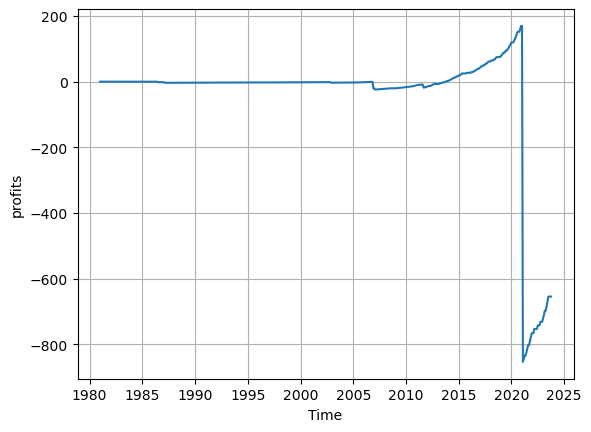

In [58]:
plt.plot(np.cumsum(df["Profits"]))  
plt.grid()
plt.xlabel("Time")
plt.ylabel("profits")
plt.plot()

# there is a huge different cuz there is covid out there

# 5.5.) Short write up about how you see your skills valuable to PJ and/or Philip Liu 

With my advanced NLP capabilities, I can monitor and analyze news, social media, and other textual data sources for sentiment analysis. This can provide an edge in understanding market sentiment and its potential impact on cryptocurrency markets.